In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
#Load data to pandas and check dtype

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission_df = pd.read_csv("gender_submission.csv")

print(train_df.dtypes, "\n")
print("Training dataset elements: ", train_df['PassengerId'].size)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Training dataset elements:  891


In [3]:
display(train_df.head())
display(test_df.head())
display(sample_submission_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
#Change dtypes for test_df and train_df

embarkation_mapping = {"C":"Cherbourg", "Q":"Queenstown", "S":"Southampton"}

for dataframe in [test_df, train_df]:
    dataframe['Sex'] = dataframe['Sex'].astype('category')
    dataframe['Pclass'] = dataframe['Pclass'].astype('category')
    dataframe['Embarked'] = dataframe['Embarked'].astype('category').map(embarkation_mapping)

train_df['Survived'] = train_df['Survived'].astype('bool')

print(train_df.dtypes)

PassengerId       int64
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


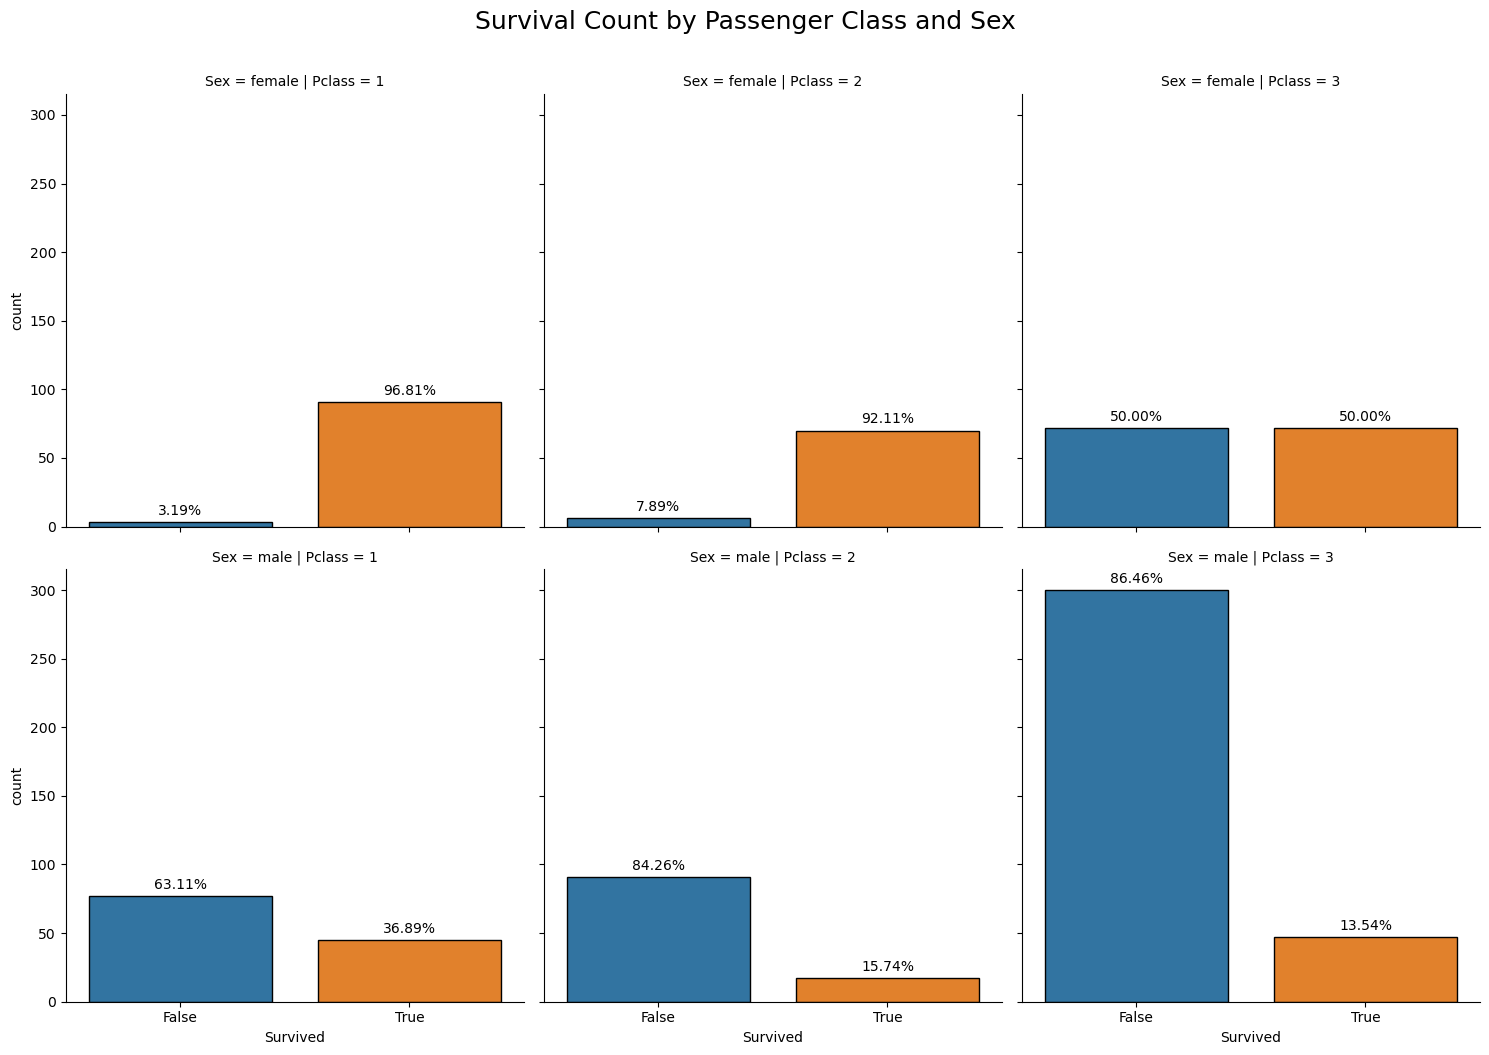

In [5]:
# Create catplot
fig1 = sns.catplot(
    data=train_df, x="Survived", kind="count", col='Pclass', row='Sex', errorbar=None
)

# Set the overall title
fig1.fig.suptitle("Survival Count by Passenger Class and Sex", fontsize=18, y=1.05)

# Add black borders to bars
for ax in fig1.axes.flat:
    for p in ax.patches:
        p.set_edgecolor('black')  # Add black border
        p.set_linewidth(1)  # Increase border thickness

    # Annotate bars with fraction values
    total = sum(p.get_height() for p in ax.patches)  # Get total count per subplot
    for p in ax.patches:
        fraction = p.get_height() / total  # Compute fraction
        ax.annotate(f"{fraction:.2%}",  # Convert to percentage format
                    (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

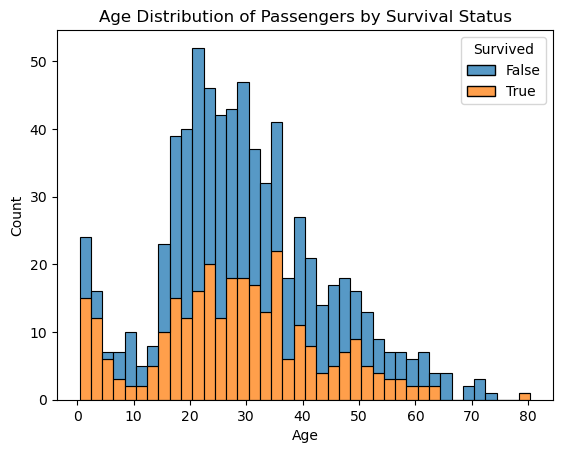

In [6]:
fig2 = sns.histplot(data=train_df, x='Age', binwidth=2, hue='Survived', multiple="stack")

# Set the overall title
# Set title correctly
plt.title("Age Distribution of Passengers by Survival Status", fontsize=12)

plt.show()

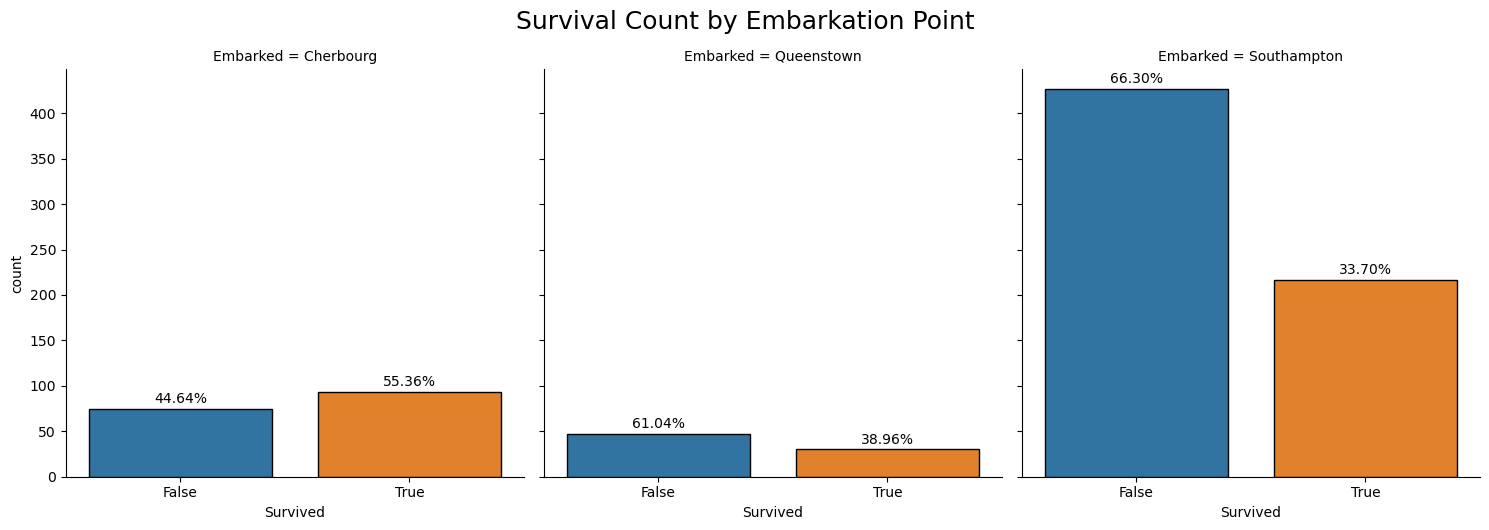

In [7]:
# Create catplot
fig1 = sns.catplot(
    data=train_df, x="Survived", kind="count", col='Embarked', errorbar=None
)

# Set the overall title
fig1.fig.suptitle("Survival Count by Embarkation Point", fontsize=18, y=1.05)

# Add black borders to bars
for ax in fig1.axes.flat:
    for p in ax.patches:
        p.set_edgecolor('black')  # Add black border
        p.set_linewidth(1)  # Increase border thickness

    # Annotate bars with fraction values
    total = sum(p.get_height() for p in ax.patches)  # Get total count per subplot
    for p in ax.patches:
        fraction = p.get_height() / total  # Compute fraction
        ax.annotate(f"{fraction:.2%}",  # Convert to percentage format
                    (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

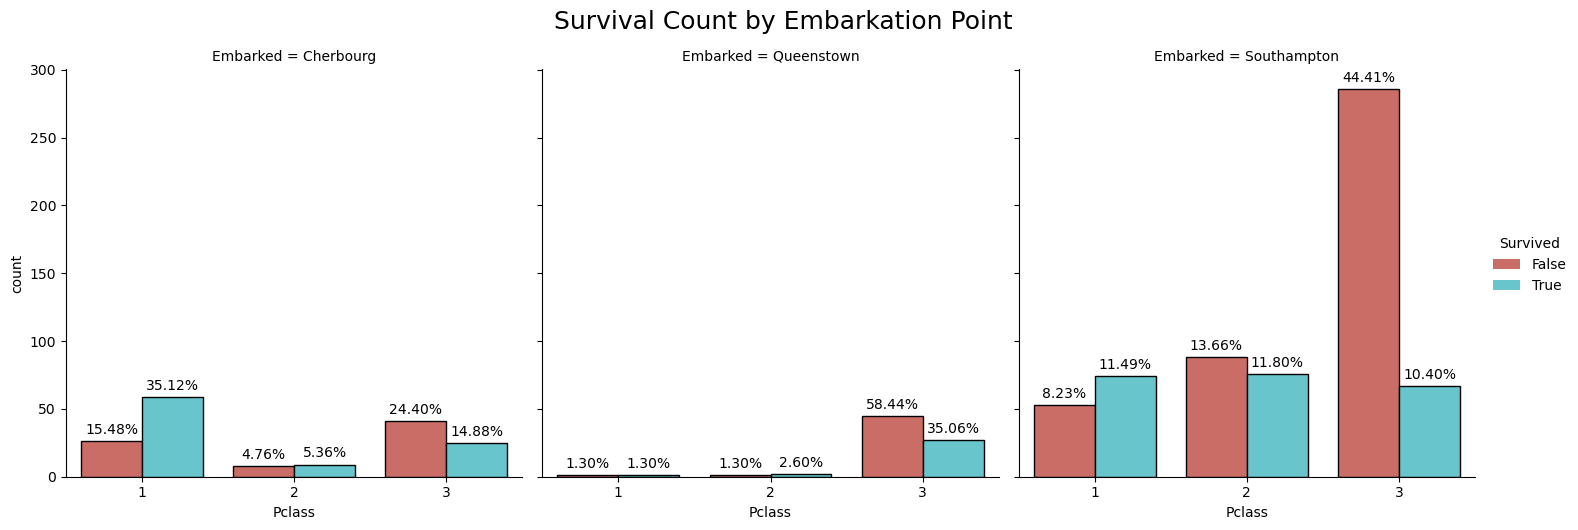

In [20]:
# Create catplot
fig1 = sns.catplot(
    data=train_df, x="Pclass", kind="count", col='Embarked', errorbar=None, palette="hls", hue='Survived'
)

# Set the overall title
fig1.fig.suptitle("Survival Count by Embarkation Point", fontsize=18, y=1.05)

# Add black borders to bars
for ax in fig1.axes.flat:
    for p in ax.patches:
        p.set_edgecolor('black')  # Add black border
        p.set_linewidth(1)  # Increase border thickness

    # Annotate bars with fraction values
    total = sum(p.get_height() for p in ax.patches)  # Get total count per subplot
    for p in ax.patches:
        fraction = p.get_height() / total  # Compute fraction
        ax.annotate(f"{fraction:.2%}",  # Convert to percentage format
                    (p.get_x() + p.get_width() / 2., p.get_height() + 3), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

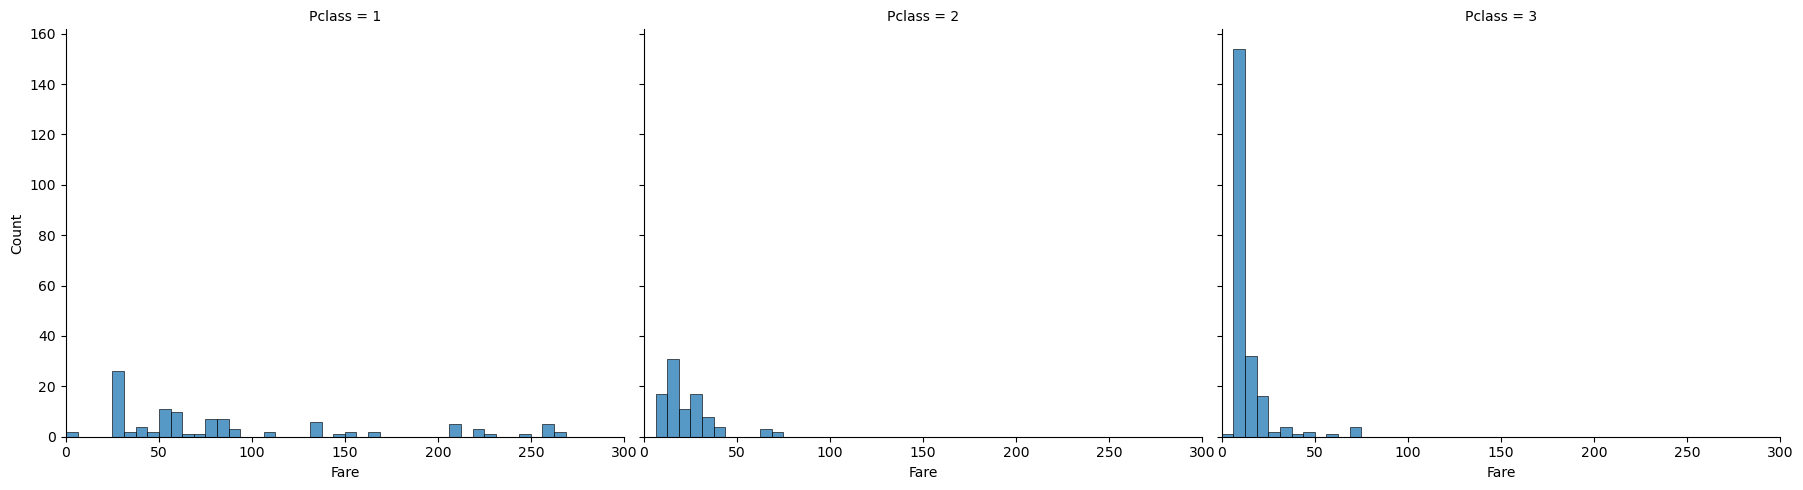

In [9]:
fig4 = sns.displot(data=test_df, x="Fare", col="Pclass", aspect=1.2)
fig4.set(xlim=(0, 300))
plt.show()

In [10]:
test_df[test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].isna().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,Southampton
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,Southampton
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,Cherbourg
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Queenstown
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Queenstown
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton


# Perform Model Creation and Training

In [11]:
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df[['Survived']].values.reshape(-1,)
display(X.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,Southampton
1,1,female,38.0,1,0,71.2833,Cherbourg
2,3,female,26.0,0,0,7.9250,Southampton
3,1,female,35.0,1,0,53.1000,Southampton
4,3,male,35.0,0,0,8.0500,Southampton


In [12]:
#Train-Test-Split with stratification to avoid class imbalance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [13]:
# Define column types
num_features = ['Fare', 'Age', 'SibSp', 'Parch']
cat_features = ['Sex', 'Pclass', 'Embarked']

# Preprocessing: Handle missing values, scale numerical & encode categorical
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
        ('scaler', StandardScaler())  # Standardize numeric features
    ]), num_features),
    
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Encode categorical data
])

In [14]:
# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())  
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


# Predict survival for actual test set

In [15]:
X_test_actual = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_pred_actual = pipeline.predict(X_test_actual)

In [16]:
test_output_df = pd.DataFrame()
test_output_df['PassengerId'] = test_df['PassengerId']
test_output_df['Survived'] = y_pred_actual.astype(int)
display(test_output_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
